In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
marvel_df = pd.read_csv('../data/marvel_movies1.csv')
marvel_df.head(1)

,Unnamed: 0,movie_title,revenue,release,studio
0,0,Avengers: Endgame,"$858,373,000","Apr 26, 2019",Walt Disney Studios Motion Pictures\n\n


In [3]:
marvel_df = marvel_df.drop(columns=['Unnamed: 0'])
marvel_df

,movie_title,revenue,release,studio
0,Avengers: Endgame,"$858,373,000","Apr 26, 2019",Walt Disney Studios Motion Pictures\n\n
1,Spider-Man: No Way Home,"$804,793,477","Dec 17, 2021",Sony Pictures Releasing\n\n
2,Black Panther,"$700,059,566","Feb 16, 2018",Walt Disney Studios Motion Pictures\n\n
3,Avengers: Infinity War,"$678,815,482","Apr 27, 2018",Walt Disney Studios Motion Pictures\n\n
4,The Avengers,"$623,357,910","May 4, 2012",Walt Disney Studios Motion Pictures\n\n
...,...,...,...,...
78,Columbia 100th Anniversary SeriesColumbia 100t...,"$6,013,515","Apr 15, 2024",Sony Pictures Releasing\n\n
79,Inhumans,"$1,521,787","Sep 1, 2017",IMAX\n\n
80,Guardians of the Galaxy2020 Re-release,"$542,000","Nov 13, 2020",Walt Disney Studios Motion Pictures\n\n
81,Iron Man2020 Re-release,"$430,000","Jul 17, 2020",Walt Disney Pictures\n\n


In [4]:
marvel_df['studio'] = marvel_df['studio'].str.replace('\n\n', '', regex=False)
marvel_df

,movie_title,revenue,release,studio
0,Avengers: Endgame,"$858,373,000","Apr 26, 2019",Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,"$804,793,477","Dec 17, 2021",Sony Pictures Releasing
2,Black Panther,"$700,059,566","Feb 16, 2018",Walt Disney Studios Motion Pictures
3,Avengers: Infinity War,"$678,815,482","Apr 27, 2018",Walt Disney Studios Motion Pictures
4,The Avengers,"$623,357,910","May 4, 2012",Walt Disney Studios Motion Pictures
...,...,...,...,...
78,Columbia 100th Anniversary SeriesColumbia 100t...,"$6,013,515","Apr 15, 2024",Sony Pictures Releasing
79,Inhumans,"$1,521,787","Sep 1, 2017",IMAX
80,Guardians of the Galaxy2020 Re-release,"$542,000","Nov 13, 2020",Walt Disney Studios Motion Pictures
81,Iron Man2020 Re-release,"$430,000","Jul 17, 2020",Walt Disney Pictures


In [5]:
dc_df = pd.read_csv('../data/dc_movies1.csv')
dc_df.head(1)

,Unnamed: 0,movie_title,revenue,release,studio
0,0,The Dark Knight,"$533,345,358","Jul 18, 2008",Warner Bros.\n\n


In [6]:
dc_df = dc_df.drop(columns=['Unnamed: 0'])
dc_df.head()

,movie_title,revenue,release,studio
0,The Dark Knight,"$533,345,358","Jul 18, 2008",Warner Bros.\n\n
1,The Dark Knight Rises,"$448,139,099","Jul 20, 2012",Warner Bros.\n\n
2,Wonder Woman,"$412,563,408","Jun 2, 2017",Warner Bros.\n\n
3,The Batman,"$369,345,583","Mar 4, 2022",Warner Bros.\n\n
4,Joker,"$335,451,311","Oct 4, 2019",Warner Bros.\n\n


In [7]:
dc_df['studio'] = dc_df['studio'].str.replace('\n\n', '', regex=False)
dc_df.head()

,movie_title,revenue,release,studio
0,The Dark Knight,"$533,345,358","Jul 18, 2008",Warner Bros.
1,The Dark Knight Rises,"$448,139,099","Jul 20, 2012",Warner Bros.
2,Wonder Woman,"$412,563,408","Jun 2, 2017",Warner Bros.
3,The Batman,"$369,345,583","Mar 4, 2022",Warner Bros.
4,Joker,"$335,451,311","Oct 4, 2019",Warner Bros.


### Marvel Analysis

In [9]:
marvel_df['revenue'] = marvel_df['revenue'].replace({'\$': '', ',': ''}, regex=True)
marvel_df['revenue'] = pd.to_numeric(marvel_df['revenue'], errors='coerce')
marvel_df

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jenna\AppData\Local\Temp\ipykernel_47836\3297615089.py:1: SyntaxWarning: invalid escape sequence '\$'
  marvel_df['revenue'] = marvel_df['revenue'].replace({'\$': '', ',': ''}, regex=True)


,movie_title,revenue,release,studio
0,Avengers: Endgame,858373000,"Apr 26, 2019",Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,804793477,"Dec 17, 2021",Sony Pictures Releasing
2,Black Panther,700059566,"Feb 16, 2018",Walt Disney Studios Motion Pictures
3,Avengers: Infinity War,678815482,"Apr 27, 2018",Walt Disney Studios Motion Pictures
4,The Avengers,623357910,"May 4, 2012",Walt Disney Studios Motion Pictures
...,...,...,...,...
78,Columbia 100th Anniversary SeriesColumbia 100t...,6013515,"Apr 15, 2024",Sony Pictures Releasing
79,Inhumans,1521787,"Sep 1, 2017",IMAX
80,Guardians of the Galaxy2020 Re-release,542000,"Nov 13, 2020",Walt Disney Studios Motion Pictures
81,Iron Man2020 Re-release,430000,"Jul 17, 2020",Walt Disney Pictures


In [10]:
top_10_movies = marvel_df.sort_values(by='revenue', ascending=False).head(10)
top_10_movies

,movie_title,revenue,release,studio
0,Avengers: Endgame,858373000,"Apr 26, 2019",Walt Disney Studios Motion Pictures
1,Spider-Man: No Way Home,804793477,"Dec 17, 2021",Sony Pictures Releasing
2,Black Panther,700059566,"Feb 16, 2018",Walt Disney Studios Motion Pictures
3,Avengers: Infinity War,678815482,"Apr 27, 2018",Walt Disney Studios Motion Pictures
4,The Avengers,623357910,"May 4, 2012",Walt Disney Studios Motion Pictures
5,Avengers: Age of Ultron,459005868,"May 1, 2015",Walt Disney Studios Motion Pictures
6,Black Panther: Wakanda Forever,453829060,"Nov 11, 2022",Walt Disney Studios Motion Pictures
7,Captain Marvel,426829839,"Mar 8, 2019",Walt Disney Studios Motion Pictures
8,Doctor Strange in the Multiverse of Madness,411331607,"May 6, 2022",Walt Disney Studios Motion Pictures
9,Iron Man 3,409013994,"May 3, 2013",Walt Disney Studios Motion Pictures


C:\Users\Jenna\AppData\Local\Temp\ipykernel_47836\3744681596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='movie_title', data=top_10_movies, palette='Reds')


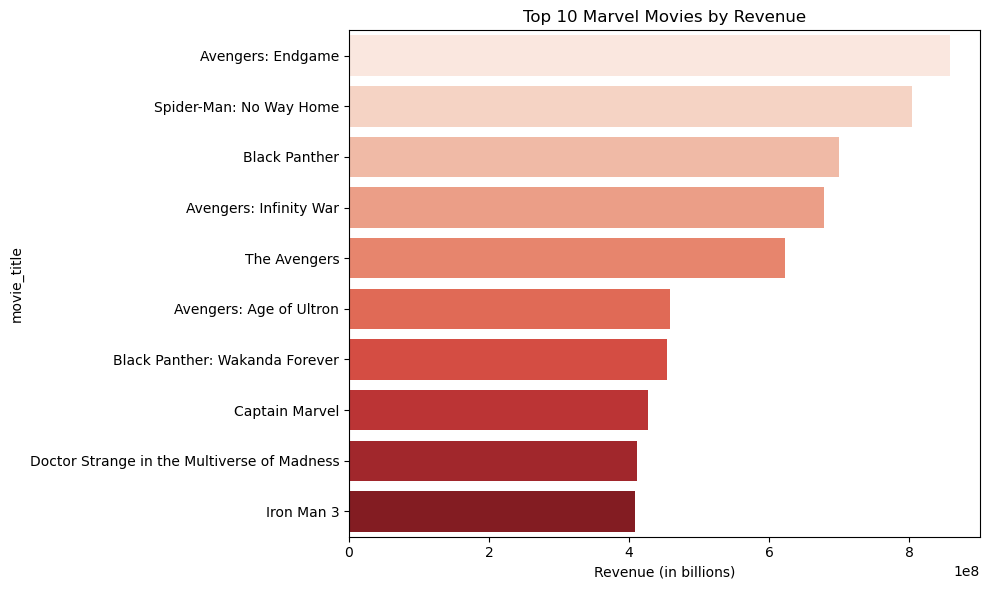

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='movie_title', data=top_10_movies, palette='Reds')
plt.xlabel('Revenue (in billions)')
plt.title('Top 10 Marvel Movies by Revenue')
plt.tight_layout()
plt.show()

In [12]:
marvel_df['release'] = pd.to_datetime(marvel_df['release'], format='%b %d, %Y', errors='coerce')
marvel_df['year'] = marvel_df['release'].dt.year

In [13]:
marvel_movie_counts = marvel_df.groupby('year')['movie_title'].count().reset_index()
marvel_movie_counts

,year,movie_title
0,1986,1
1,1998,1
2,2000,1
3,2002,3
4,2003,3
5,2004,3
6,2005,2
7,2006,1
8,2007,3
9,2008,3


## DC Comic Analysis

In [15]:
dc_df['revenue'] = marvel_df['revenue'].replace({'\$': '', ',': ''}, regex=True)
dc_df['revenue'] = pd.to_numeric(marvel_df['revenue'], errors='coerce')
dc_df

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Jenna\AppData\Local\Temp\ipykernel_47836\917243527.py:1: SyntaxWarning: invalid escape sequence '\$'
  dc_df['revenue'] = marvel_df['revenue'].replace({'\$': '', ',': ''}, regex=True)


,movie_title,revenue,release,studio
0,The Dark Knight,858373000,"Jul 18, 2008",Warner Bros.
1,The Dark Knight Rises,804793477,"Jul 20, 2012",Warner Bros.
2,Wonder Woman,700059566,"Jun 2, 2017",Warner Bros.
3,The Batman,678815482,"Mar 4, 2022",Warner Bros.
4,Joker,623357910,"Oct 4, 2019",Warner Bros.
...,...,...,...,...
60,Batman Returns2021 Re-release,56117548,-,Warner Bros.
61,Batman: Mask of the Phantasm2018 Re-release,52411906,"Nov 12, 2018",Fathom Events
62,Birds of Prey2021 Re-release,51774002,-,Warner Bros.
63,Batman Begins2021 Re-release,33810189,-,Warner Bros.


In [16]:
top_10_dc_movies = dc_df.sort_values(by='revenue', ascending=False).head(10)
top_10_dc_movies

,movie_title,revenue,release,studio
0,The Dark Knight,858373000,"Jul 18, 2008",Warner Bros.
1,The Dark Knight Rises,804793477,"Jul 20, 2012",Warner Bros.
2,Wonder Woman,700059566,"Jun 2, 2017",Warner Bros.
3,The Batman,678815482,"Mar 4, 2022",Warner Bros.
4,Joker,623357910,"Oct 4, 2019",Warner Bros.
5,Aquaman,459005868,"Dec 21, 2018",Warner Bros.
6,Batman v Superman: Dawn of Justice,453829060,"Mar 25, 2016",Warner Bros.
7,Suicide Squad,426829839,"Aug 5, 2016",Warner Bros.
8,Man of Steel,411331607,"Jun 14, 2013",Warner Bros.
9,Batman,409013994,"Jun 23, 1989",Warner Bros.


C:\Users\Jenna\AppData\Local\Temp\ipykernel_47836\1976066111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='movie_title', data=top_10_dc_movies, palette='Blues')


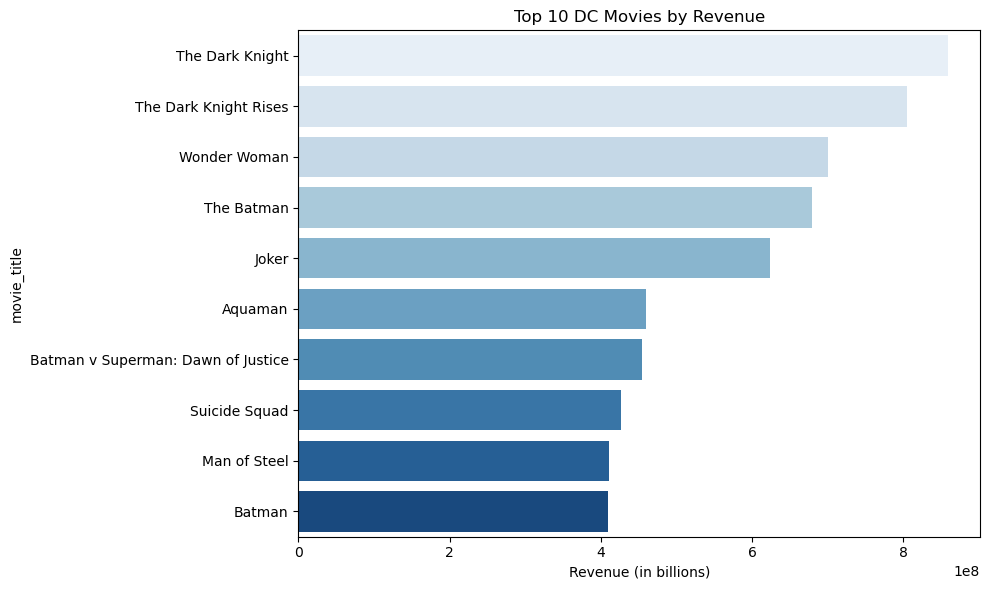

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='movie_title', data=top_10_dc_movies, palette='Blues')
plt.xlabel('Revenue (in billions)')
plt.title('Top 10 DC Movies by Revenue')
plt.tight_layout()
plt.show()

In [18]:
dc_df['release'] = pd.to_datetime(dc_df['release'], format='%b %d, %Y', errors='coerce')
dc_df

,movie_title,revenue,release,studio
0,The Dark Knight,858373000,2008-07-18,Warner Bros.
1,The Dark Knight Rises,804793477,2012-07-20,Warner Bros.
2,Wonder Woman,700059566,2017-06-02,Warner Bros.
3,The Batman,678815482,2022-03-04,Warner Bros.
4,Joker,623357910,2019-10-04,Warner Bros.
...,...,...,...,...
60,Batman Returns2021 Re-release,56117548,NaT,Warner Bros.
61,Batman: Mask of the Phantasm2018 Re-release,52411906,2018-11-12,Fathom Events
62,Birds of Prey2021 Re-release,51774002,NaT,Warner Bros.
63,Batman Begins2021 Re-release,33810189,NaT,Warner Bros.


In [19]:
dc_df['year'] = dc_df['release'].dt.year
dc_movie_counts = dc_df.groupby('year')['movie_title'].count().reset_index()
dc_movie_counts

,year,movie_title
0,1978.0,1
1,1981.0,1
2,1983.0,1
3,1984.0,1
4,1987.0,1
5,1989.0,1
6,1992.0,1
7,1993.0,1
8,1995.0,1
9,1997.0,2


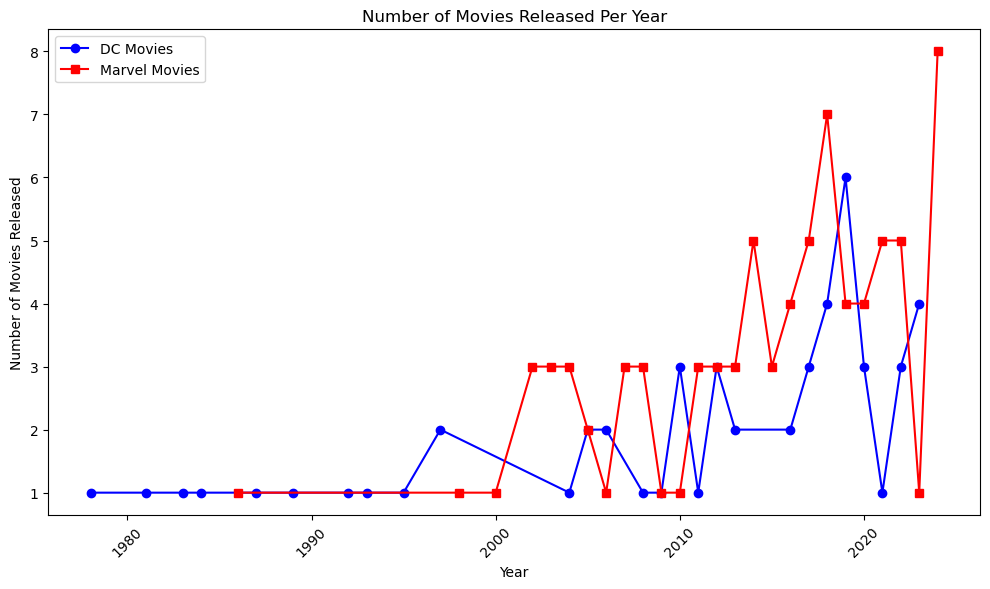

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(dc_movie_counts['year'], dc_movie_counts['movie_title'], marker='o', linestyle='-', color='b', label='DC Movies')
plt.plot(marvel_movie_counts['year'], marvel_movie_counts['movie_title'], marker='s', linestyle='-', color='r', label='Marvel Movies')

plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Per Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()